# Pokémon Data Analysis

### Imports and Set Up

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the plots to display in the Jupyter notebook.
%matplotlib inline

# Change plotting colors.
plt.style.use('seaborn')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 14

# Create DataFrame
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


## Part I

In [107]:
# Return a Pokémon's type(s), stats, weight, and height.
pokemon_stats = pokemon[['name', 'type1', 'type2', 'weight_kg', 'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
  
# Return mean for each pokemon stat (e.g. mean speed for all pokemon) (Bonus: Filter by type and see how that changess).
# def mean_stat_calculator(self):
#   pass
  
# Return English name is given Japanese name, return Japanese name if given English name.

def name_converter(name):
    
  name_eng = pokemon[['name', 'japanese_name']]
  name_eng.set_index('name', inplace=True)
  
  if name in name_eng.index:
    return f'The Japanese name of {name} is ' + name_eng.loc[name, 'japanese_name']
  else:
    return 'That is not a Pokemon name!'

print(name_converter('Bulbasaur'))
print(name_converter('Charizard'))
print(name_converter('Mew'))
print(name_converter('Umbreon'))
print(name_converter('Cubone'))

The Japanese name of Bulbasaur is Fushigidaneフシギダネ
The Japanese name of Charizard is Lizardonリザードン
The Japanese name of Mew is Mewミュウ
The Japanese name of Umbreon is Blackyブラッキー
The Japanese name of Cubone is Karakaraカラカラ



## Part II

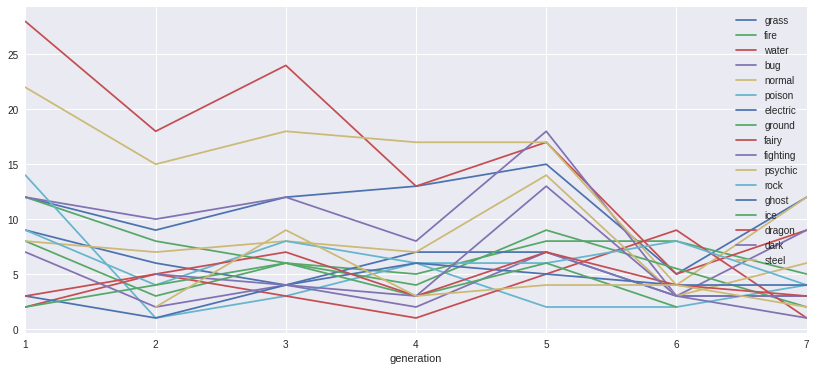

In [0]:
# Graph Pokémon types over the different generations
### Line graph?
### X axis is generation number, Y axis is number

# pokemon[['generation', 'type1', 'type2']].head()

# pokemon.groupby(['generation', 'type1', 'type2']).count()

pokemon['type2'] = pokemon['type2'].fillna(pokemon['type1'])
# pokemon[['type1', 'type2']].head(20)

pokemon['combined_type'] = pokemon['type1'] + pokemon['type2']

# pokemon.groupby(['generation', 'combined_type'])['combined_type'].count().plot(kind='line')

# pokemon_filtered = pokemon[pokemon['combined_type'] == 'grassgrass']
# pokemon_filtered.groupby(['generation', 'combined_type'])['combined_type'].count().plot(kind='line')

#########################

# get unique combined_types into ... something (series?)
# for each unique combined_type, run the filter above and perform groupby + plot using
# see if graph makes sense...? might be too much

# df = pd.read_table('data', sep='\s+')
fig, ax = plt.subplots()

# for key, grp in df.groupby(['color']):
#     ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)

# plt.legend(loc='best')
# plt.show()

combined_types_unique = pokemon['type1'].unique()
combined_types_unique

# pokemon_filtered = pokemon[pokemon['type1'] == 'grass'].groupby(['generation', 'type1'])['type1'].count()
# pokemon_filtered.plot(kind='bar')

# pokemon_filtered = pokemon[pokemon['type1'] == 'fire'].groupby(['generation', 'type1'])['type1'].count()
# pokemon_filtered.plot(kind='bar')

for type_ in combined_types_unique:
  if type_ in ['flying']:
      continue
      
  pokemon_filtered = pokemon[pokemon['type1'] == type_].groupby(['generation'])['type1'].count()
  
  ax = pokemon_filtered.plot(ax=ax, kind='line', label=type_)
#   pokemon_filtered.groupby(['generation', 'type1'])['type1'].count().plot(kind='line')
  
plt.legend(loc='best')
plt.show()


In [0]:
# Graph any correlation between Pokemon weight/height and their statistics or type.
### Scatter plot?